In [1]:
import numpy as np
from scipy import special

# kevin's magic formula
def degree_of_certainty(successes_a, failures_a, successes_b, failures_b):
  the_range = np.arange(successes_b + 1)
  conditional_a = special.betaln(successes_a + 1, failures_a + 1)
  return np.sum(np.exp(
                    special.betaln(1 + successes_a + the_range, failures_a + failures_b + 2)
                  - np.log(1 + failures_b + the_range)
                  - special.betaln(1 + the_range, 1 + failures_b)
                  - conditional_a))

In [5]:
import pandas as pd
df = pd.DataFrame()
for N in [400, 600, 800]:
    for base_rate in [0.05, 0.075, 0.10]:
        for engaged in np.arange(round(base_rate*N),round(base_rate*N+0.1*N)): 
            successes_b = engaged
            failures_b = N - successes_b
            successes_a = round(base_rate * N)
            failures_a = N - successes_a
            doc = degree_of_certainty(successes_a, failures_a, successes_b, failures_b)
            new_row = [[N, base_rate, (engaged/N)-base_rate, doc]]
            df = df.append(new_row, ignore_index=True)

df.columns=['N','base_rate', 'improvement', 'doc']


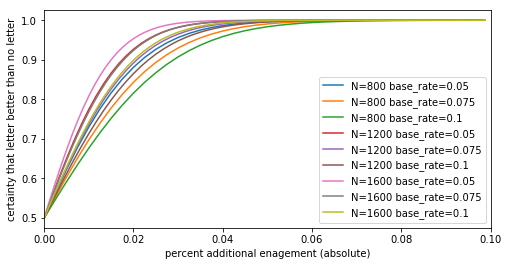

In [6]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
for (N, base_rate), mini_df in df.groupby(['N', 'base_rate']):
    ax.plot(mini_df.improvement, mini_df.doc, label=f'N={N*2} base_rate={round(base_rate,3)}') 
    
ax.set_xlim([0, 0.1])
ax.set_xlabel('percent additional enagement (absolute)')
ax.set_ylabel('certainty that letter better than no letter')
fig.set_size_inches(8, 4)
plt.legend()

In [4]:
for N in [400,600,1200]:
    for base_rate in [0.075,]:
        for er in [base_rate+0.01, base_rate+0.02, base_rate+0.04, base_rate+0.08, ]: 
            engaged = round(er*N)
            successes_b = engaged
            failures_b = N - successes_b
            successes_a = round(base_rate * N)
            failures_a = N - successes_a
            doc = degree_of_certainty(successes_a, failures_a, successes_b, failures_b)
            improvement = (engaged/N)-base_rate
            print([N*2, base_rate, round(improvement,3),round(doc,2)])


[800, 0.075, 0.01, 0.69999999999999996]
[800, 0.075, 0.02, 0.83999999999999997]
[800, 0.075, 0.04, 0.96999999999999997]
[800, 0.075, 0.08, 1.0]
[1200, 0.075, 0.01, 0.73999999999999999]
[1200, 0.075, 0.02, 0.89000000000000001]
[1200, 0.075, 0.04, 0.98999999999999999]
[1200, 0.075, 0.08, 1.0]
[2400, 0.075, 0.01, 0.81999999999999995]
[2400, 0.075, 0.02, 0.95999999999999996]
[2400, 0.075, 0.04, 1.0]
[2400, 0.075, 0.08, 1.0]
